# Question Answer Model

# Pre-Requisites/ Requirements

In [ ]:
!pip install tensorflow==1.8.0

     |████████████████████████████████| 49.1MB 83kB/s 
     |████████████████████████████████| 3.1MB 41.5MB/s 
     |████████████████████████████████| 890kB 45.5MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=c3732282eae9fcaa50c1585a4f88770054146b8b1e62ded8048078feb4440b95
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.2.1
    Uninstalling bleach-3.2.1:
      Successfully uninstalled bleach-3.2.1
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import urllib
import sys
import os
import zipfile
import tarfile
import json 
import hashlib
import re
import itertools

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:522: FutureWarning: Passing (type, 1) or 

# Babl Dataset 

This data set, like all QA data sets, contains questions. Questions in bAbI are very straightforward, although some are trickier than others. All of the questions in this data set have an associated context, which is a sequence of sentences guaranteed to have the details necessary to answer the question

Questions in the bAbI data set are partitioned into 20 different tasks based on what skills are required to answer the question. Each task has its own set of questions for training, and a separate set for testing. These tasks test a variety of standard natural language processing abilities, including time reasoning (task #14) and inductive logic (task #16). 

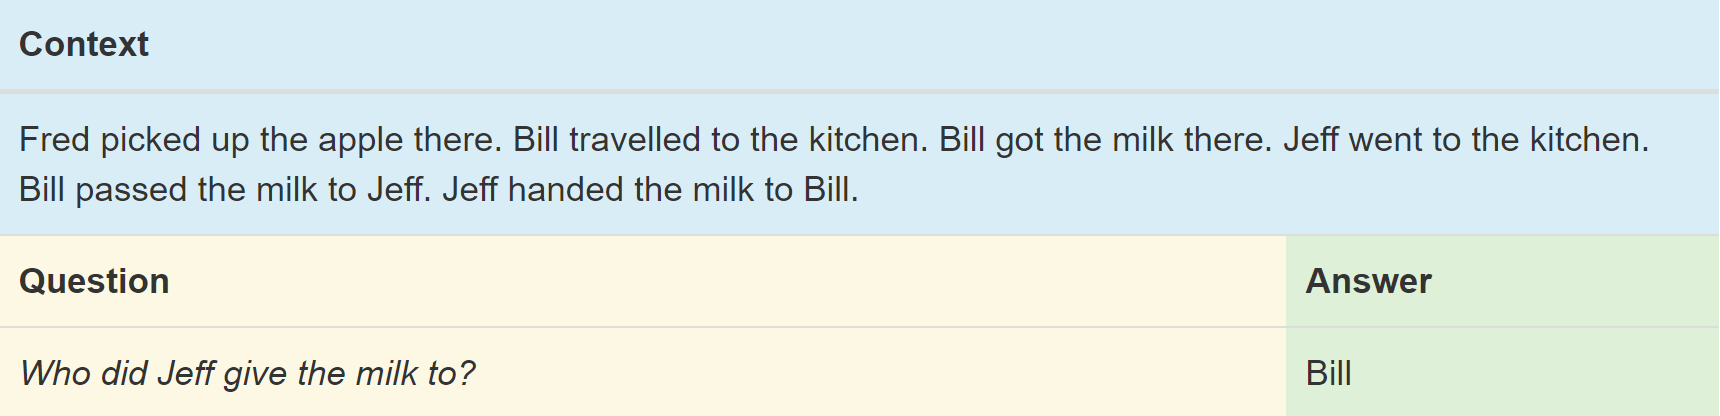


# Selecting Task 5 

This task (#15) tests the network's understanding of actions where there are relationships between three objects. Grammatically speaking, it tests to see if the system can distinguish between the subject, direct object, and indirect object.

In [ ]:
glove_zip_file = "/content/drive/My Drive/Question and Answer/glove.6B.zip"
glove_vectors_file = "/content/drive/My Drive/Question and Answer/glove.6B.50d.txt"

# 15 MB
data_set_zip = "/content/drive/My Drive/Question and Answer/tasks_1-20_v1-2.tar.gz"

#Select "task 5"
train_set_file = "/content/drive/My Drive/Question and Answer/qa5_three-arg-relations_train.txt"
test_set_file = "/content/drive/My Drive/Question and Answer/qa5_three-arg-relations_test.txt"

#train_set_post_file = "/content/drive/My Drive/Question and Answer/tasks_1-20_v1-2/en/"+train_set_file
#test_set_post_file = "/content/drive/My Drive/Question and Answer/tasks_1-20_v1-2/en/"+test_set_file

# Downloading the Dataset

In [ ]:
#try: from urllib.request import urlretrieve, urlopen
#except ImportError: 
#    from urllib import urlretrieve
#    from urllib2 import urlopen
#large file - 862 MB
#if (not os.path.isfile(glove_zip_file) and
#    not os.path.isfile(glove_vectors_file)):
#    urlretrieve ("http://nlp.stanford.edu/data/glove.6B.zip", 
#                 glove_zip_file)
#if (not os.path.isfile(data_set_zip) and
#    not (os.path.isfile(train_set_file) and os.path.isfile(test_set_file))):
#    urlretrieve ("https://s3.amazonaws.com/text-datasets/babi_tasks_1-20_v1-2.tar.gz", 
#                 data_set_zip)

# Unziping the file

In [ ]:
#def unzip_single_file(zip_file_name, output_file_name):
#    """
#        If the output file is already created, don't recreate
#        If the output file does not exist, create it from the zipFile
#    """
#    if not os.path.isfile(output_file_name):
#        with open(output_file_name, 'wb') as out_file:
#            with zipfile.ZipFile(zip_file_name) as zipped:
#                for info in zipped.infolist():
#                    if output_file_name in info.filename:
#                        with zipped.open(info) as requested_file:
#                            out_file.write(requested_file.read())
#                            return
#def targz_unzip_single_file(zip_file_name, output_file_name, interior_relative_path):
#    if not os.path.isfile(output_file_name):
#        with tarfile.open(zip_file_name) as un_zipped:
#            un_zipped.extract(interior_relative_path+output_file_name)    
#unzip_single_file(glove_zip_file, glove_vectors_file)
#targz_unzip_single_file(data_set_zip, train_set_file, "/content/drive/My Drive/Question and Answer/tasks_1-20_v1-2/en/")
#targz_unzip_single_file(data_set_zip, test_set_file, "/content/drive/My Drive/Question and Answer/tasks_1-20_v1-2/en/")

# Parsing GloVe and handling unknown tokens

Using **sentence2sequence, which is a function that would turn a string into a matrix, based on the mapping defined by GloVe. This function split up the string into tokens, which are smaller strings that are roughly equivalent to punctuation, words, or parts of words.** For example, in "Bill traveled to the kitchen," there are six tokens: five that correspond to each of the words, and the last for the period at the end. Each token gets individually vectorized, resulting in a list of vectors corresponding to each sentence

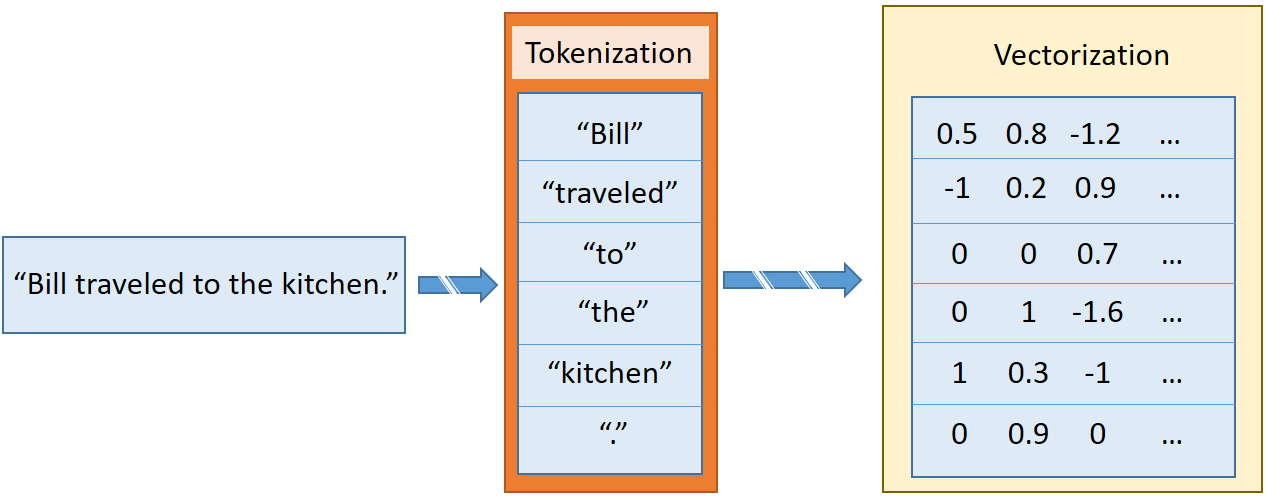

In some tasks in bAbI, the system will encounter words that are not in the GloVe word vectorization. In order for the network to be capable of processing these unknown words, we need to maintain a consistent vectorization of those words.

**We can use randomization to draw a new vectorization for each unique unknown token.**

In [ ]:
# Deserialize GloVe vectors
glove_wordmap = {}
with open(glove_vectors_file, "r", encoding="utf8") as glove:
    for line in glove:
        name, vector = tuple(line.split(" ", 1))
        glove_wordmap[name] = np.fromstring(vector, sep=" ")

The first time we run across a new unknown token, we simply draw a new vectorization from the **(Gaussian-approximated) distribution of the original GloVe vectorizations**, and add that vectorization back to the GloVe word map. To gather the distribution hyperparameters, Numpy has functions that automatically calculate variance and mean.

**fill_unk will take care of giving us a new word vectorization whenever we need one.**

In [ ]:
wvecs = []
for item in glove_wordmap.items():
    wvecs.append(item[1])
s = np.vstack(wvecs)

# Gather the distribution hyperparameters
v = np.var(s,0) 
m = np.mean(s,0) 
RS = np.random.RandomState()

def fill_unk(unk):
    global glove_wordmap
    glove_wordmap[unk] = RS.multivariate_normal(m,np.diag(v))
    return glove_wordmap[unk]

**The limited vocabulary of bAbI tasks means the network can learn the relationships between words even without knowing what the words mean.** However, for speed of learning, we should choose vectorizations that have inherent meaning when we can. To do this, we use a greedy search for words that exist in Stanford’s GLoVe word vectorization data set, and if the word does not exist, then we fill in the entire word with an unknown, randomly created, new representation.

In [ ]:
def sentence2sequence(sentence):
    """
     
    - Turns an input paragraph into an (m,d) matrix, 
        where n is the number of tokens in the sentence
        and d is the number of dimensions each word vector has.
    
      TensorFlow doesn't need to be used here, as simply
      turning the sentence into a sequence based off our 
      mapping does not need the computational power that
      TensorFlow provides. Normal Python suffices for this task.
    """
    tokens = sentence.strip('"(),-').lower().split(" ")
    rows = []
    words = []
    #Greedy search for tokens
    for token in tokens:
        i = len(token)
        while len(token) > 0:
            word = token[:i]
            if word in glove_wordmap:
                rows.append(glove_wordmap[word])
                words.append(word)
                token = token[i:]
                i = len(token)
                continue
            else:
                i = i-1
            if i == 0:
                rows.append(fill_unk(token))
                words.append(token)
                break
    return np.array(rows), words

Now we can package all the data together needed for each question, including the vectorization of the contexts, questions, and answers. In bAbI, contexts are defined by a numbered sequence of sentences, which **contextualize function** deserializes into a list of sentences associated with one context. Questions and answers are on the same line, separated by tabs, so we can use tabs as a marker of whether a specific line refers to a question or not

In [ ]:
def contextualize(set_file):
    """
    Read in the dataset of questions and build question+answer -> context sets.
    Output is a list of data points, each of which is a 7-element tuple containing:
        The sentences in the context in vectorized form.
        The sentences in the context as a list of string tokens.
        The question in vectorized form.
        The question as a list of string tokens.
        The answer in vectorized form.
        The answer as a list of string tokens.
        A list of numbers for supporting statements, which is currently unused.
    """
    data = []
    context = []
    with open(set_file, "r", encoding="utf8") as train:
        for line in train:
            l, ine = tuple(line.split(" ", 1))
            # Split the line numbers from the sentences they refer to.
            if l is "1":
                # New contexts always start with 1, 
                # so this is a signal to reset the context.
                context = []
            if "\t" in ine: 
                # Tabs are the separator between questions and answers,
                # and are not present in context statements.
                question, answer, support = tuple(ine.split("\t"))
                data.append((tuple(zip(*context))+
                             sentence2sequence(question)+
                             sentence2sequence(answer)+
                             ([int(s) for s in support.split()],)))
                # Multiple questions may refer to the same context, so we don't reset it.
            else:
                # Context sentence.
                context.append(sentence2sequence(ine[:-1]))
    return data
train_data = contextualize(train_set_file)
test_data = contextualize(test_set_file)

In [ ]:
final_train_data = []
def finalize(data):
    """
    Prepares data generated by contextualize() for use in the network.
    """
    final_data = []
    for cqas in data:
        contextvs, contextws, qvs, qws, avs, aws, spt = cqas

        lengths = itertools.accumulate(len(cvec) for cvec in contextvs)
        context_vec = np.concatenate(contextvs)
        context_words = sum(contextws,[])
        
        # Location markers for the beginnings of new sentences.
        sentence_ends = np.array(list(lengths)) 
        final_data.append((context_vec, sentence_ends, qvs, spt, context_words, cqas, avs, aws))
    return np.array(final_data)
final_train_data = finalize(train_data)   
final_test_data = finalize(test_data)


# Defining hyperparameters

At this point, we have fully prepared our training data and our testing data. The next task is to construct the network we’ll use to understand the data. Let’s start by clearing out the TensorFlow default graph so we always have the option to run the network again if we want to change something

In [ ]:
tf.reset_default_graph()

Since this is the beginning of the actual network, let’s also define all the constants we’ll need for the network. We call these “hyperparameters,” as they define how the network looks and trains:

In [ ]:
# Hyperparameters

# The number of dimensions used to store data passed between recurrent layers in the network.
recurrent_cell_size = 128

# The number of dimensions in our word vectorizations.
D = 50 

# How quickly the network learns. Too high, and we may run into numeric instability 
# or other issues.
learning_rate = 0.005

# Dropout probabilities. For a description of dropout and what these probabilities are, 
# see Entailment with TensorFlow.
input_p, output_p = 0.5, 0.5

# How many questions we train on at a time.
batch_size = 128

# Number of passes in episodic memory. We'll get to this later.
passes = 4

# Feed Forward layer sizes: the number of dimensions used to store data passed from feed-forward layers.
ff_hidden_size = 256

weight_decay = 0.00000001
# The strength of our regularization. Increase to encourage sparsity in episodic memory, 
# but makes training slower. Don't make this larger than leraning_rate.

training_iterations_count = 400000
# How many questions the network trains on each time it is trained. 
# Some questions are counted multiple times.

display_step = 100
# How many iterations of training occur before each validation check.


# Network Structure

The network is designed around having a recurrent layer’s memory be set dynamically, based on other information in the text, hence the name dynamic memory network (DMN). DMNs are loosely based on an understanding of how a human tries to answer a reading-comprehension-type question. The person gets a chance, first of all, to read the context and create memories of the facts inside. With those facts in mind, they then read the question, and re-examine the context specifically searching for the answer to that question, comparing the question to each of the facts.

Sometimes, one fact guides us to another. In the bAbI data set, the network might want to find the location of a football. It might search for sentences about the football to find that John was the last person to touch the football, then search for sentences about John to find that John had been in both the bedroom and the hallway. Once it realizes that John had been last in the hallway, it can then answer the question and confidently say that the football is in the hallway.

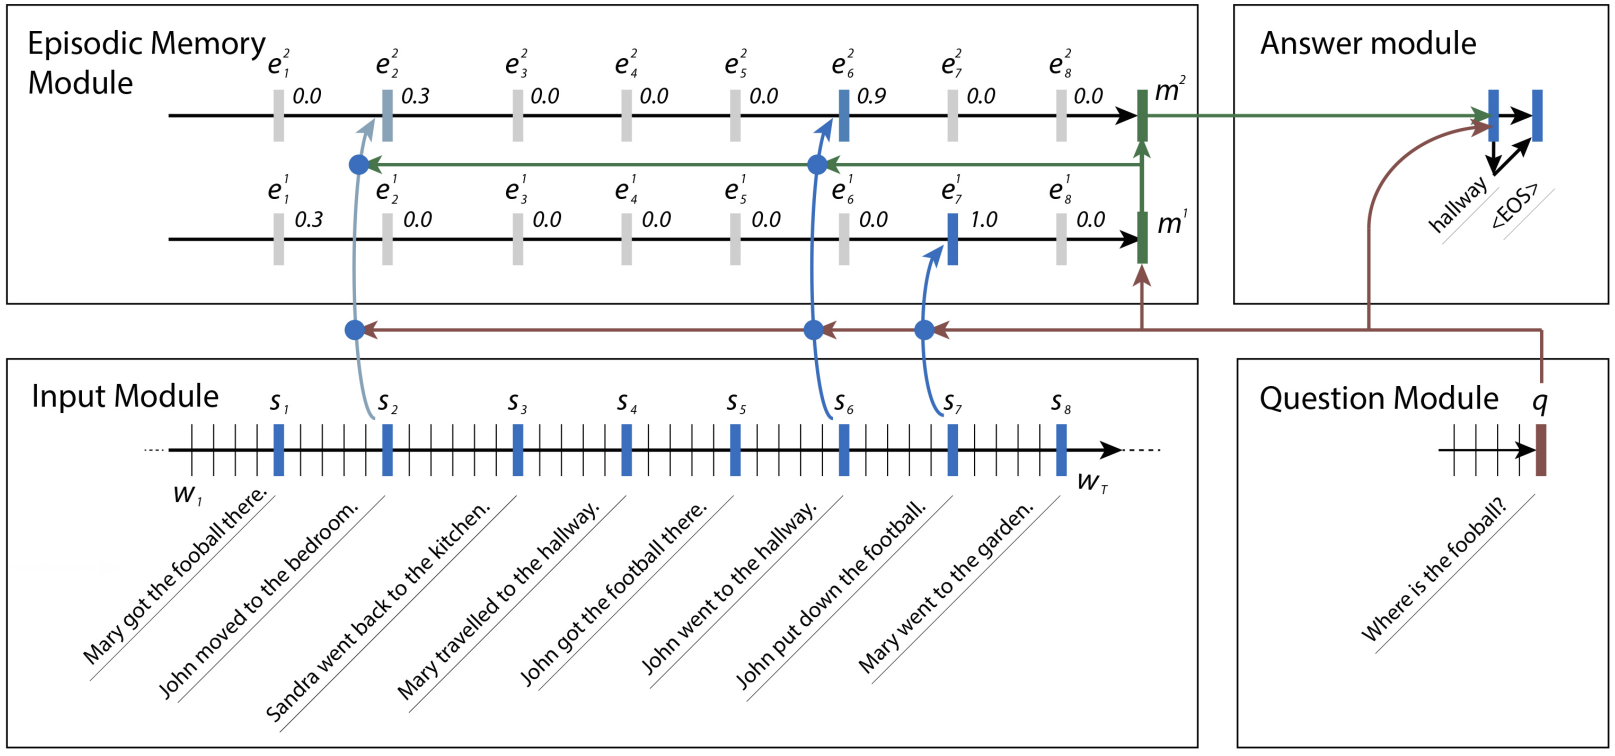

# Input

The input module is the first of the four modules that a dynamic memory network uses to come up with its answer, and consists of a simple pass over the input with a **gated recurrent unit, or GRU, (TensorFlow’s tf.contrib.nn.GRUCell)** to gather pieces of evidence. Each piece of evidence, or fact, corresponds to a single sentence in the context, and is represented by the output at that timestep.

In [ ]:
# Input Module

# Context: A [batch_size, maximum_context_length, word_vectorization_dimensions] tensor 
# that contains all the context information.
context = tf.placeholder(tf.float32, [None, None, D], "context")  
context_placeholder = context # I use context as a variable name later on

# input_sentence_endings: A [batch_size, maximum_sentence_count, 2] tensor that 
# contains the locations of the ends of sentences. 
input_sentence_endings = tf.placeholder(tf.int32, [None, None, 2], "sentence")

# recurrent_cell_size: the number of hidden units in recurrent layers.
input_gru = tf.contrib.rnn.GRUCell(recurrent_cell_size)

# input_p: The probability of maintaining a specific hidden input unit.
# Likewise, output_p is the probability of maintaining a specific hidden output unit.
gru_drop = tf.contrib.rnn.DropoutWrapper(input_gru, input_p, output_p)

# dynamic_rnn also returns the final internal state. We don't need that, and can
# ignore the corresponding output (_). 
input_module_outputs, _ = tf.nn.dynamic_rnn(gru_drop, context, dtype=tf.float32, scope = "input_module")

# cs: the facts gathered from the context.
cs = tf.gather_nd(input_module_outputs, input_sentence_endings)
# to use every word as a fact, useful for tasks with one-sentence contexts
s = input_module_outputs

# Question

The question module is the second module, and arguably the simplest. It consists of another GRU pass, this time over the text of the question. Instead of pieces of evidence, we can simply pass forward the end state, as the question is guaranteed by the data set to be one sentence long.

In [ ]:
# Question Module

# query: A [batch_size, maximum_question_length, word_vectorization_dimensions] tensor 
#  that contains all of the questions.

query = tf.placeholder(tf.float32, [None, None, D], "query")

# input_query_lengths: A [batch_size, 2] tensor that contains question length information. 
# input_query_lengths[:,1] has the actual lengths; input_query_lengths[:,0] is a simple range() 
# so that it plays nice with gather_nd.
input_query_lengths = tf.placeholder(tf.int32, [None, 2], "query_lengths")

question_module_outputs, _ = tf.nn.dynamic_rnn(gru_drop, query, dtype=tf.float32, 
                                               scope = tf.VariableScope(True, "input_module"))

# q: the question states. A [batch_size, recurrent_cell_size] tensor.
q = tf.gather_nd(question_module_outputs, input_query_lengths)


# Episodic memory

Our third module, the episodic memory module, is where things begin to get interesting. It uses attention to do multiple passes, each pass consisting of GRUs iterating over the input. Each iteration inside each pass has a weighted update on current memory, based on how much attention is being paid to the corresponding fact at that time.

**Attention**

Attention in neural networks was originally designed for image analysis, especially for cases where parts of the image are far more relevant than others. Networks use attention to determine the best locations in which to do further analysis when performing tasks, such as finding locations of objects in images, tracking objects that move between images, facial recognition, or other tasks that benefit from finding the most pertinent information for the task within the image.

We calculate attention in this model by **constructing similarity measures between each fact, our current memory, and the original question.** (Note that this is different from normal attention, which only constructs similarity measures between facts and current memory.) We pass the results through a **two-layer feed-forward network to get an attention constant for each fact**. We then modify the memory by doing a weighted pass with a GRU over the input facts (weighted by the corresponding attention constant). In order to avoid adding incorrect information into memory when the context is shorter than the full length of the matrix, we create a mask for which facts exist and don’t attend at all (i.e., retain the same memory) when the fact does not exist.



In [ ]:
# Episodic Memory

# make sure the current memory (i.e. the question vector) is broadcasted along the facts dimension
size = tf.stack([tf.constant(1),tf.shape(cs)[1], tf.constant(1)])
re_q = tf.tile(tf.reshape(q,[-1,1,recurrent_cell_size]),size)


# Final output for attention, needs to be 1 in order to create a mask
output_size = 1 

# Weights and biases
attend_init = tf.random_normal_initializer(stddev=0.1)
w_1 = tf.get_variable("attend_w1", [1,recurrent_cell_size*7, recurrent_cell_size], 
                      tf.float32, initializer = attend_init)
w_2 = tf.get_variable("attend_w2", [1,recurrent_cell_size, output_size], 
                      tf.float32, initializer = attend_init)

b_1 = tf.get_variable("attend_b1", [1, recurrent_cell_size], 
                      tf.float32, initializer = attend_init)
b_2 = tf.get_variable("attend_b2", [1, output_size], 
                      tf.float32, initializer = attend_init)

# Regulate all the weights and biases
tf.add_to_collection(tf.GraphKeys.REGULARIZATION_LOSSES, tf.nn.l2_loss(w_1))
tf.add_to_collection(tf.GraphKeys.REGULARIZATION_LOSSES, tf.nn.l2_loss(b_1))
tf.add_to_collection(tf.GraphKeys.REGULARIZATION_LOSSES, tf.nn.l2_loss(w_2))
tf.add_to_collection(tf.GraphKeys.REGULARIZATION_LOSSES, tf.nn.l2_loss(b_2))

def attention(c, mem, existing_facts):
    """
    Custom attention mechanism.
    c: A [batch_size, maximum_sentence_count, recurrent_cell_size] tensor 
        that contains all the facts from the contexts.
    mem: A [batch_size, maximum_sentence_count, recurrent_cell_size] tensor that 
        contains the current memory. It should be the same memory for all facts for accurate results.
    existing_facts: A [batch_size, maximum_sentence_count, 1] tensor that 
        acts as a binary mask for which facts exist and which do not.
    
    """
    with tf.variable_scope("attending") as scope:
        # attending: The metrics by which we decide what to attend to.
        attending = tf.concat([c, mem, re_q, c * re_q,  c * mem, (c-re_q)**2, (c-mem)**2], 2)
        
        # m1: First layer of multiplied weights for the feed-forward network. 
        #     We tile the weights in order to manually broadcast, since tf.matmul does not
        #     automatically broadcast batch matrix multiplication as of TensorFlow 1.2.
        m1 = tf.matmul(attending * existing_facts, 
                       tf.tile(w_1, tf.stack([tf.shape(attending)[0],1,1]))) * existing_facts
        # bias_1: A masked version of the first feed-forward layer's bias
        #     over only existing facts.

        bias_1 = b_1 * existing_facts
        
        # tnhan: First nonlinearity. In the original paper, this is a tanh nonlinearity; 
        #        choosing relu was a design choice intended to avoid issues with 
        #        low gradient magnitude when the tanh returned values close to 1 or -1. 
        tnhan = tf.nn.relu(m1 + bias_1)
        
        # m2: Second layer of multiplied weights for the feed-forward network. 
        #     Still tiling weights for the same reason described in m1's comments.
        m2 = tf.matmul(tnhan, tf.tile(w_2, tf.stack([tf.shape(attending)[0],1,1])))
        
        # bias_2: A masked version of the second feed-forward layer's bias.
        bias_2 = b_2 * existing_facts
        
        # norm_m2: A normalized version of the second layer of weights, which is used 
        #     to help make sure the softmax nonlinearity doesn't saturate.
        norm_m2 = tf.nn.l2_normalize(m2 + bias_2, -1)
        
        # softmaxable: A hack in order to use sparse_softmax on an otherwise dense tensor. 
        #     We make norm_m2 a sparse tensor, then make it dense again after the operation.
        softmax_idx = tf.where(tf.not_equal(norm_m2, 0))[:,:-1]
        softmax_gather = tf.gather_nd(norm_m2[...,0], softmax_idx)
        softmax_shape = tf.shape(norm_m2, out_type=tf.int64)[:-1]
        softmaxable = tf.SparseTensor(softmax_idx, softmax_gather, softmax_shape)
        return tf.expand_dims(tf.sparse_tensor_to_dense(tf.sparse_softmax(softmaxable)),-1)

# facts_0s: a [batch_size, max_facts_length, 1] tensor 
#     whose values are 1 if the corresponding fact exists and 0 if not.
facts_0s = tf.cast(tf.count_nonzero(input_sentence_endings[:,:,-1:],-1,keep_dims=True),tf.float32)


with tf.variable_scope("Episodes") as scope:
    attention_gru = tf.contrib.rnn.GRUCell(recurrent_cell_size)
    
    # memory: A list of all tensors that are the (current or past) memory state 
    #   of the attention mechanism.
    memory = [q]
    
    # attends: A list of all tensors that represent what the network attends to.
    attends = []
    for a in range(passes):
        # attention mask
        attend_to = attention(cs, tf.tile(tf.reshape(memory[-1],[-1,1,recurrent_cell_size]),size),
                              facts_0s)
        
        # Inverse attention mask, for what's retained in the state.
        retain = 1-attend_to
        
        # GRU pass over the facts, according to the attention mask.
        while_valid_index = (lambda state, index: index < tf.shape(cs)[1])
        update_state = (lambda state, index: (attend_to[:,index,:] * 
                                                 attention_gru(cs[:,index,:], state)[0] + 
                                                 retain[:,index,:] * state))
        # start loop with most recent memory and at the first index
        memory.append(tuple(tf.while_loop(while_valid_index,
                          (lambda state, index: (update_state(state,index),index+1)),
                           loop_vars = [memory[-1], 0]))[0]) 
        
        attends.append(attend_to)
        
        # Reuse variables so the GRU pass uses the same variables every pass.
        scope.reuse_variables()

Instructions for updating:
keep_dims is deprecated, use keepdims instead


# Answer

The final module is the answer module, which regresses from the question and episodic memory modules’ outputs using a fully connected layer to a “final result” word vector, and the word in the context that is closest in distance to that result is our final output (to guarantee the result is an actual word). We calculate the closest word by creating a “score” for each word, which indicates the final result’s distance from the word. While you can design an answer module that can return multiple words, it is not needed for the bAbI tasks we attempt in this article.

In [ ]:
# Answer Module

# a0: Final memory state. (Input to answer module)
a0 = tf.concat([memory[-1], q], -1)

# fc_init: Initializer for the final fully connected layer's weights.
fc_init = tf.random_normal_initializer(stddev=0.1) 

with tf.variable_scope("answer"):
    # w_answer: The final fully connected layer's weights.
    w_answer = tf.get_variable("weight", [recurrent_cell_size*2, D], 
                               tf.float32, initializer = fc_init)
    # Regulate the fully connected layer's weights
    tf.add_to_collection(tf.GraphKeys.REGULARIZATION_LOSSES, 
                     tf.nn.l2_loss(w_answer)) 
    
    # The regressed word. This isn't an actual word yet; 
    #    we still have to find the closest match.
    logit = tf.expand_dims(tf.matmul(a0, w_answer),1)
    
    # Make a mask over which words exist.
    with tf.variable_scope("ending"):
        all_ends = tf.reshape(input_sentence_endings, [-1,2])
        range_ends = tf.range(tf.shape(all_ends)[0])
        ends_indices = tf.stack([all_ends[:,0],range_ends], axis=1)
        ind = tf.reduce_max(tf.scatter_nd(ends_indices, all_ends[:,1],
                                          [tf.shape(q)[0], tf.shape(all_ends)[0]]),
                            axis=-1)
        range_ind = tf.range(tf.shape(ind)[0])
        mask_ends = tf.cast(tf.scatter_nd(tf.stack([ind, range_ind], axis=1), 
                                          tf.ones_like(range_ind), [tf.reduce_max(ind)+1, 
                                                                    tf.shape(ind)[0]]), bool)
        # A bit of a trick. With the locations of the ends of the mask (the last periods in 
        #  each of the contexts) as 1 and the rest as 0, we can scan with exclusive or 
        #  (starting from all 1). For each context in the batch, this will result in 1s 
        #  up until the marker (the location of that last period) and 0s afterwards.
        mask = tf.scan(tf.logical_xor,mask_ends, tf.ones_like(range_ind, dtype=bool))
        
    # We score each possible word inversely with their Euclidean distance to the regressed word.
    #  The highest score (lowest distance) will correspond to the selected word.
    logits = -tf.reduce_sum(tf.square(context*tf.transpose(tf.expand_dims(
                    tf.cast(mask, tf.float32),-1),[1,0,2]) - logit), axis=-1)

# Optimizing optimization

Gradient descent is the default optimizer for a neural network. Its goal is to decrease the network’s “loss,” which is a measure of how poorly the network performs. It does this by finding the derivative of loss with respect to each of the weights under the current input, and then “descends” the weights so they’ll reduce the loss. Most of the time, this works well enough, but often it’s not ideal. There are various schemes that use “momentum” or other approximations of the more direct path to the optimal weights. One of the most useful of these optimization schemes is known as adaptive moment estimation, or Adam.

Adam estimates the first two moments of the gradient by calculating an exponentially decaying average of past iterations’ gradients and squared gradients, which correspond to the estimated mean and the estimated variance of these gradients. The calculations use two additional hyperparameters to indicate how quickly the averages decay with the addition of new information. The averages are initialized as zero, which leads to bias toward zero, especially when those hyperparameters near one.

In order to counteract that bias, Adam computes bias-corrected moment estimates that are greater in magnitude than the originals. The corrected estimates are then used to update the weights throughout the network. The combination of these estimates make Adam one of the best choices overall for optimization, especially for complex networks. This applies doubly to data that is very sparse, such as is common in natural language processing tasks.

In [ ]:
# Training

# gold_standard: The real answers.
gold_standard = tf.placeholder(tf.float32, [None, 1, D], "answer")
with tf.variable_scope('accuracy'):
    eq = tf.equal(context, gold_standard)
    corrbool = tf.reduce_all(eq,-1)
    logloc = tf.reduce_max(logits, -1, keep_dims = True)
    # locs: A boolean tensor that indicates where the score 
    #  matches the minimum score. This happens on multiple dimensions, 
    #  so in the off chance there's one or two indexes that match 
    #  we make sure it matches in all indexes.
    locs = tf.equal(logits, logloc)
    
    # correctsbool: A boolean tensor that indicates for which 
    #   words in the context the score always matches the minimum score.
    correctsbool = tf.reduce_any(tf.logical_and(locs, corrbool), -1)
    # corrects: A tensor that is simply correctsbool cast to floats.
    corrects = tf.where(correctsbool, tf.ones_like(correctsbool, dtype=tf.float32), 
                        tf.zeros_like(correctsbool,dtype=tf.float32))
    
    # corr: corrects, but for the right answer instead of our selected answer.
    corr = tf.where(corrbool, tf.ones_like(corrbool, dtype=tf.float32), 
                        tf.zeros_like(corrbool,dtype=tf.float32))
with tf.variable_scope("loss"):
    # Use sigmoid cross entropy as the base loss, 
    #  with our distances as the relative probabilities. There are
    #  multiple correct labels, for each location of the answer word within the context.
    loss = tf.nn.sigmoid_cross_entropy_with_logits(logits = tf.nn.l2_normalize(logits,-1),
                                                   labels = corr)
    
    # Add regularization losses, weighted by weight_decay.
    total_loss = tf.reduce_mean(loss) + weight_decay * tf.add_n(
        tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES))

# TensorFlow's default implementation of the Adam optimizer works. We can adjust more than 
#  just the learning rate, but it's not necessary to find a very good optimum.
optimizer = tf.train.AdamOptimizer(learning_rate)

# Once we have an optimizer, we ask it to minimize the loss 
#   in order to work towards the proper training.
opt_op = optimizer.minimize(total_loss)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [ ]:
# Initialize variables
init = tf.global_variables_initializer()

# Launch the TensorFlow session
sess = tf.Session()
sess.run(init)

# Train the network

With everything set and ready, we can begin batching our training data to train our network! While the system is training, we should check on how well the network is doing in terms of accuracy. We do this with a validation set, which is taken from testing data so it has no overlap with the training data.

Using a validation set based on testing data allows us to get a better sense of how well the network can generalize what it learns and apply it to other contexts. If we validate on the training data, the network may overfit—in other words, learn specific examples and memorize the answers to them, which doesn’t help the network answer new questions.

In [ ]:
def prep_batch(batch_data, more_data = False):
    """
        Prepare all the preproccessing that needs to be done on a batch-by-batch basis.
    """
    context_vec, sentence_ends, questionvs, spt, context_words, cqas, answervs, _ = zip(*batch_data)
    ends = list(sentence_ends)
    maxend = max(map(len, ends))
    aends = np.zeros((len(ends), maxend))
    for index, i in enumerate(ends):
        for indexj, x in enumerate(i):
            aends[index, indexj] = x-1
    new_ends = np.zeros(aends.shape+(2,))

    for index, x in np.ndenumerate(aends):
        new_ends[index+(0,)] = index[0]
        new_ends[index+(1,)] = x

    contexts = list(context_vec)
    max_context_length = max([len(x) for x in contexts])
    contextsize = list(np.array(contexts[0]).shape)
    contextsize[0] = max_context_length
    final_contexts = np.zeros([len(contexts)]+contextsize)

    contexts = [np.array(x) for x in contexts]
    for i, context in enumerate(contexts):
        final_contexts[i,0:len(context),:] = context
    max_query_length = max(len(x) for x in questionvs)
    querysize = list(np.array(questionvs[0]).shape)
    querysize[:1] = [len(questionvs),max_query_length]
    queries = np.zeros(querysize)
    querylengths = np.array(list(zip(range(len(questionvs)),[len(q)-1 for q in questionvs])))
    questions = [np.array(q) for q in questionvs]
    for i, question in enumerate(questions):
        queries[i,0:len(question),:] = question
    data = {context_placeholder: final_contexts, input_sentence_endings: new_ends, 
                            query:queries, input_query_lengths:querylengths, gold_standard: answervs}
    return (data, context_words, cqas) if more_data else data

If you installed TQDM, you can use it to keep track of how long the network has been training and receive an estimate of when training will finish. You can stop the training at any time if you feel the results are good enough by interrupting the Jupyter Notebook kernel.

In [ ]:
# Use TQDM if installed
tqdm_installed = False
try:
    from tqdm import tqdm
    tqdm_installed = True
except:
    pass


# Prepare validation set
batch = np.random.randint(final_test_data.shape[0], size=batch_size*10)
batch_data = final_test_data[batch]

validation_set, val_context_words, val_cqas = prep_batch(batch_data, True)

# training_iterations_count: The number of data pieces to train on in total
# batch_size: The number of data pieces per batch
def train(iterations, batch_size):
    training_iterations = range(0,iterations,batch_size)
    if tqdm_installed:
        # Add a progress bar if TQDM is installed
        training_iterations = tqdm(training_iterations)

    wordz = []
    for j in training_iterations:

        batch = np.random.randint(final_train_data.shape[0], size=batch_size)
        batch_data = final_train_data[batch]

        sess.run([opt_op], feed_dict=prep_batch(batch_data))
        if (j/batch_size) % display_step == 0:

            # Calculate batch accuracy
            acc, ccs, tmp_loss, log, con, cor, loc  = sess.run([corrects, cs, total_loss, logit,
                                                                context_placeholder,corr, locs], 
                                                               feed_dict=validation_set)
            # Display results
            print("Iter " + str(j/batch_size) + ", Minibatch Loss= ",tmp_loss,
                  "Accuracy= ", np.mean(acc))
train(30000,batch_size) # Small amount of training for preliminary results

  0%|          | 1/235 [00:33<2:11:31, 33.72s/it]

Iter 0.0, Minibatch Loss=  0.671209 Accuracy=  0.0


 43%|████▎     | 101/235 [12:01<32:03, 14.35s/it]

Iter 100.0, Minibatch Loss=  0.6704893 Accuracy=  0.22109374


 86%|████████▌ | 201/235 [23:28<07:48, 13.79s/it]

Iter 200.0, Minibatch Loss=  0.67042625 Accuracy=  0.42421874


100%|██████████| 235/235 [26:56<00:00,  6.88s/it]


After a little bit of training, let’s peek inside and see what kinds of answers we’re getting from the network. In the diagrams below, we visualize attention over each of the episodes (rows) for all the sentences (columns) in our context; darker colors represent more attention paid to that sentence on that episode.

You should see attention change between at least two episodes for each question, but sometimes attention will be able to find the answer within one, and sometimes it will take all four episodes. If the attention appears to be blank, it may be saturating and paying attention to everything at once. In that case, you can try training with a higher weight_decay in order to discourage that from happening. Later on in training, saturation becomes extremely common.

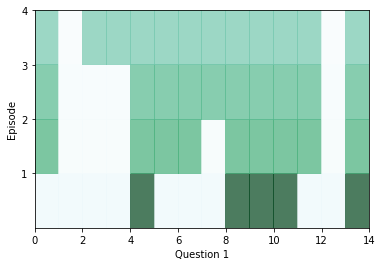

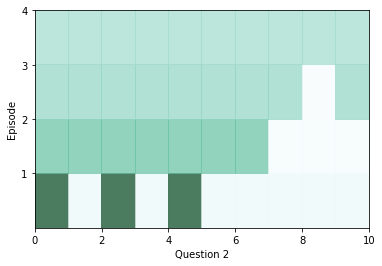

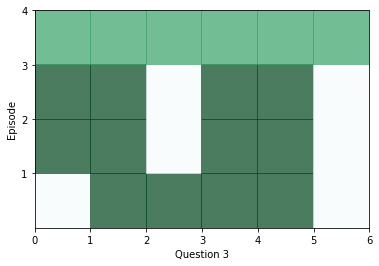

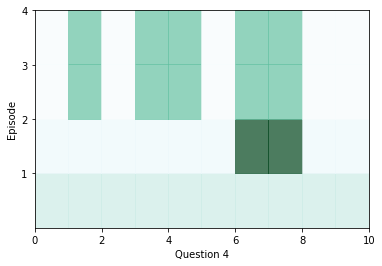

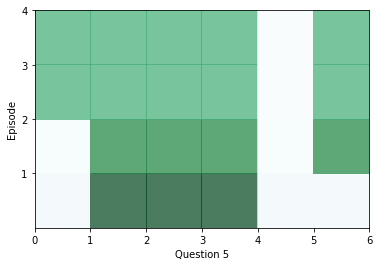

In [ ]:
ancr = sess.run([corrbool,locs, total_loss, logits, facts_0s, w_1]+attends+
                [query, cs, question_module_outputs],feed_dict=validation_set)
a = ancr[0]
n = ancr[1]
cr = ancr[2]
attenders = np.array(ancr[6:-3]) 
faq = np.sum(ancr[4], axis=(-1,-2)) # Number of facts in each context

limit = 5
for question in range(min(limit, batch_size)):
    plt.yticks(range(passes,0,-1))
    plt.ylabel("Episode")
    plt.xlabel("Question "+str(question+1))
    pltdata = attenders[:,question,:int(faq[question]),0] 
    # Display only information about facts that actually exist, all others are 0
    pltdata = (pltdata - pltdata.mean()) / ((pltdata.max() - pltdata.min() + 0.001)) * 256
    plt.pcolor(pltdata, cmap=plt.cm.BuGn, alpha=0.7)
    plt.show()

#print(list(map((lambda x: x.shape),ancr[3:])), new_ends.shape)

In [ ]:
# Locations of responses within contexts
indices = np.argmax(n,axis=1)

# Locations of actual answers within contexts 
indicesc = np.argmax(a,axis=1)

for i,e,cw, cqa in list(zip(indices, indicesc, val_context_words, val_cqas))[:limit]:
    ccc = " ".join(cw)
    print("TEXT: ",ccc)
    print ("QUESTION: ", " ".join(cqa[3]))
    print ("RESPONSE: ", cw[i], ["Correct", "Incorrect"][i!=e])
    print("EXPECTED: ", cw[e])
    print()

TEXT:  fred travelled to the bedroom . jeff travelled to the office . fred went to the hallway . bill moved to the office . mary travelled to the bedroom . bill journeyed to the bedroom . jeff went back to the kitchen . bill picked up the apple there . bill handed the apple to mary . jeff grabbed the milk there . jeff went to the garden . bill went back to the office . jeff moved to the hallway . jeff gave the milk to fred .
QUESTION:  what did jeff give to fred ?
RESPONSE:  apple Incorrect
EXPECTED:  milk

TEXT:  fred travelled to the kitchen . jeff journeyed to the hallway . fred took the football there . fred handed the football to mary . fred moved to the hallway . jeff went back to the kitchen . mary passed the football to jeff . mary journeyed to the bathroom . mary moved to the garden . jeff travelled to the garden .
QUESTION:  who gave the football ?
RESPONSE:  mary Correct
EXPECTED:  mary

TEXT:  bill went to the garden . mary journeyed to the hallway . jeff picked up the appl

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # This is added back by InteractiveShellApp.init_path()


# Let’s keep training!

In [ ]:
train(training_iterations_count, batch_size)

  0%|          | 1/3125 [00:33<29:12:00, 33.65s/it]

Iter 0.0, Minibatch Loss=  0.6704312 Accuracy=  0.42734376


  3%|▎         | 101/3125 [12:54<12:54:17, 15.36s/it]

Iter 100.0, Minibatch Loss=  0.67045426 Accuracy=  0.4640625


  6%|▋         | 201/3125 [24:59<11:32:37, 14.21s/it]

Iter 200.0, Minibatch Loss=  0.67045486 Accuracy=  0.4921875


 10%|▉         | 301/3125 [36:57<11:03:16, 14.09s/it]

Iter 300.0, Minibatch Loss=  0.67058647 Accuracy=  0.5375


 13%|█▎        | 401/3125 [48:50<12:11:18, 16.11s/it]

Iter 400.0, Minibatch Loss=  0.6705763 Accuracy=  0.5734375


 16%|█▌        | 501/3125 [1:01:37<11:40:32, 16.02s/it]

Iter 500.0, Minibatch Loss=  0.67060214 Accuracy=  0.57421875


 19%|█▉        | 601/3125 [1:13:59<10:05:36, 14.40s/it]

Iter 600.0, Minibatch Loss=  0.67061466 Accuracy=  0.61875


 22%|██▏       | 701/3125 [1:26:18<11:36:49, 17.25s/it]

Iter 700.0, Minibatch Loss=  0.6706246 Accuracy=  0.6234375


 26%|██▌       | 801/3125 [1:38:33<10:22:19, 16.07s/it]

Iter 800.0, Minibatch Loss=  0.6705178 Accuracy=  0.62109375


 29%|██▉       | 901/3125 [1:50:48<9:21:45, 15.16s/it]

Iter 900.0, Minibatch Loss=  0.67069685 Accuracy=  0.63984376


 32%|███▏      | 1001/3125 [2:02:49<8:26:06, 14.30s/it]

Iter 1000.0, Minibatch Loss=  0.6706455 Accuracy=  0.6617187


 35%|███▌      | 1101/3125 [2:15:14<8:29:20, 15.10s/it]

Iter 1100.0, Minibatch Loss=  0.67075545 Accuracy=  0.640625


 38%|███▊      | 1201/3125 [2:26:51<8:23:08, 15.69s/it]

Iter 1200.0, Minibatch Loss=  0.6705849 Accuracy=  0.62109375


 42%|████▏     | 1301/3125 [2:38:46<7:57:13, 15.70s/it]

Iter 1300.0, Minibatch Loss=  0.6706275 Accuracy=  0.6625


 45%|████▍     | 1401/3125 [2:50:49<7:09:22, 14.94s/it]

Iter 1400.0, Minibatch Loss=  0.6705949 Accuracy=  0.6585938


 48%|████▊     | 1501/3125 [3:03:06<7:12:06, 15.96s/it]

Iter 1500.0, Minibatch Loss=  0.67057174 Accuracy=  0.6539062


 51%|█████     | 1601/3125 [3:15:42<7:40:11, 18.12s/it]

Iter 1600.0, Minibatch Loss=  0.67061055 Accuracy=  0.6617187


 54%|█████▍    | 1701/3125 [3:28:04<6:06:12, 15.43s/it]

Iter 1700.0, Minibatch Loss=  0.6706266 Accuracy=  0.65625


 58%|█████▊    | 1801/3125 [3:40:20<5:28:08, 14.87s/it]

Iter 1800.0, Minibatch Loss=  0.6706773 Accuracy=  0.6695312


 61%|██████    | 1901/3125 [3:52:15<4:46:52, 14.06s/it]

Iter 1900.0, Minibatch Loss=  0.67073894 Accuracy=  0.6765625


 64%|██████▍   | 2001/3125 [4:04:39<5:21:03, 17.14s/it]

Iter 2000.0, Minibatch Loss=  0.6706637 Accuracy=  0.653125


 67%|██████▋   | 2101/3125 [4:17:09<4:16:12, 15.01s/it]

Iter 2100.0, Minibatch Loss=  0.6707148 Accuracy=  0.6703125


 70%|███████   | 2201/3125 [4:29:29<3:37:59, 14.15s/it]

Iter 2200.0, Minibatch Loss=  0.67068213 Accuracy=  0.6796875


 74%|███████▎  | 2301/3125 [4:41:48<3:36:22, 15.75s/it]

Iter 2300.0, Minibatch Loss=  0.67067724 Accuracy=  0.6617187


 77%|███████▋  | 2401/3125 [4:53:56<3:06:32, 15.46s/it]

Iter 2400.0, Minibatch Loss=  0.670683 Accuracy=  0.7007812


 80%|████████  | 2501/3125 [5:06:12<2:45:00, 15.87s/it]

Iter 2500.0, Minibatch Loss=  0.6706573 Accuracy=  0.67890626


 83%|████████▎ | 2601/3125 [5:18:24<2:29:37, 17.13s/it]

Iter 2600.0, Minibatch Loss=  0.670674 Accuracy=  0.6578125


 86%|████████▋ | 2701/3125 [5:31:09<1:58:47, 16.81s/it]

Iter 2700.0, Minibatch Loss=  0.6707552 Accuracy=  0.6921875


 90%|████████▉ | 2801/3125 [5:43:41<1:24:31, 15.65s/it]

Iter 2800.0, Minibatch Loss=  0.67056787 Accuracy=  0.6953125


 93%|█████████▎| 2901/3125 [5:56:01<56:53, 15.24s/it]

Iter 2900.0, Minibatch Loss=  0.67068744 Accuracy=  0.6742188


 96%|█████████▌| 3001/3125 [6:09:04<35:29, 17.17s/it]

Iter 3000.0, Minibatch Loss=  0.6705771 Accuracy=  0.6773437


 99%|█████████▉| 3101/3125 [6:21:29<06:15, 15.66s/it]

Iter 3100.0, Minibatch Loss=  0.6706547 Accuracy=  0.6734375


100%|██████████| 3125/3125 [6:24:13<00:00,  7.38s/it]


In [ ]:
# Final testing accuracy
print(np.mean(sess.run([corrects], feed_dict= prep_batch(final_test_data))[0]))

0.663


In [ ]:
sess.close()